# 갭마인더 데이터 집합 불러오기

In [126]:
import pandas as pd
gap=pd.read_csv('../../Downloads/pandas_data/gapminder.tsv', sep='\t')
gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# 불러온 데이터 집합 살펴보기

In [37]:
gap.info()
gap.size #데이터 개수
gap.index #행은 0~1703까지
len(gap) #행 개수
gap.shape #(행,열)
gap.columns #열 이름들
type(gap) #데이터프레임
gap.count() #각 열의 null이 아닌 행 개수
gap.isnull().sum() #na값 개수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

In [18]:
gap['country'].value_counts() #country 그룹별 행 개수 null 제외

Tanzania            12
Uganda              12
Algeria             12
Greece              12
Oman                12
                    ..
Korea, Dem. Rep.    12
Mauritania          12
France              12
Switzerland         12
Slovenia            12
Name: country, Length: 142, dtype: int64

In [47]:
type(gap.groupby('continent').size()) #continent 그룹별 행 개수 null포함, 시리즈
gap.groupby('continent').count() #continent 그룹별 행 개수 null포함, 데이터프레임

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [127]:
gap.sample(5)

,country,continent,year,lifeExp,pop,gdpPercap
1319,Saudi Arabia,Asia,2007,72.777,27601038,21654.831940
1133,Nigeria,Africa,1977,44.514,62209173,1981.951806
1249,Puerto Rico,Americas,1957,68.540,2260000,3907.156189
225,Cambodia,Asia,1997,56.534,11782962,734.285170
1315,Saudi Arabia,Asia,1987,66.295,14619745,21198.261360


# 열 단위로 데이터 추출하기

In [56]:
#열 하나
gap.iloc[:,2] #시리즈
gap.loc[:,'year'] #시리즈
gap[['year']] #데이터프레임

,year
0,1952
1,1957
2,1962
3,1967
4,1972
...,...
1699,1987
1700,1992
1701,1997
1702,2002


In [58]:
#열 각각 호출
gap[['year','pop']]

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
...,...,...
1699,1987,9216418
1700,1992,10704340
1701,1997,11404948
1702,2002,11926563


In [59]:
#열 슬라이싱
gap.loc[:,'year':'pop']

,year,lifeExp,pop
0,1952,28.801,8425333
1,1957,30.332,9240934
2,1962,31.997,10267083
3,1967,34.020,11537966
4,1972,36.088,13079460
...,...,...,...
1699,1987,62.351,9216418
1700,1992,60.377,10704340
1701,1997,46.809,11404948
1702,2002,39.989,11926563


In [62]:
gap.iloc[:,2:-1]

,year,lifeExp,pop
0,1952,28.801,8425333
1,1957,30.332,9240934
2,1962,31.997,10267083
3,1967,34.020,11537966
4,1972,36.088,13079460
...,...,...,...
1699,1987,62.351,9216418
1700,1992,60.377,10704340
1701,1997,46.809,11404948
1702,2002,39.989,11926563


# loc 속성으로 행 단위 데이터 추출하기

In [79]:
#행 슬라이싱 
gap[10:13] #13 미포함
gap.loc[10:13] #13 포함

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
12,Albania,Europe,1952,55.230,1282697,1601.056136
13,Albania,Europe,1957,59.280,1476505,1942.284244


In [71]:
#단일 행
gap.loc[50,:]

country      Argentina
continent     Americas
year              1962
lifeExp         65.142
pop           21283783
gdpPercap      7133.17
Name: 50, dtype: object

In [84]:
#행 리스트
gap.loc[[100,3]]

,country,continent,year,lifeExp,pop,gdpPercap
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
3,Afghanistan,Asia,1967,34.020,11537966,836.197138


In [89]:
gap.loc[1:3,'year':'pop']

,year,lifeExp,pop
1,1957,30.332,9240934
2,1962,31.997,10267083
3,1967,34.020,11537966


In [93]:
gap.loc[[3,1],['year','pop']]

,year,pop
3,1967,11537966
1,1957,9240934


2005년 이후 자료들을 대륙별로 분류

In [114]:
gap[gap.year>2005].groupby('continent').apply(lambda x: x.sort_index())

country continent  year  lifeExp       pop  \
continent                                                           
Africa    35           Algeria    Africa  2007   72.301  33333216   
          47            Angola    Africa  2007   42.731  12420476   
          131            Benin    Africa  2007   56.728   8078314   
          167         Botswana    Africa  2007   50.728   1639131   
          203     Burkina Faso    Africa  2007   52.295  14326203   
...                        ...       ...   ...      ...       ...   
Europe    1487     Switzerland    Europe  2007   81.701   7554661   
          1583          Turkey    Europe  2007   71.777  71158647   
          1607  United Kingdom    Europe  2007   79.425  60776238   
Oceania   71         Australia   Oceania  2007   81.235  20434176   
          1103     New Zealand   Oceania  2007   80.204   4115771   

                   gdpPercap  
continent                     
Africa    35     6223.367465  
          47     4797.231267  
          131    1441.284873  
          167   12569.851770  
          203    1217.032994  
...                      ...  
Europe    1487  37506.419070  
          1583   8458.276384  
          1607  33203.261280  
Oceania   71    34435.367440  
          1103  25185.009110  

[142 rows x 6 columns]

# tail과 loc는 조금 달라요!

?

In [119]:
gap.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [122]:
gap.sort_values('pop').tail(5)

,country,continent,year,lifeExp,pop,gdpPercap
707,India,Asia,2007,64.698,1110396331,2452.210407
296,China,Asia,1992,68.690,1164970000,1655.784158
297,China,Asia,1997,70.426,1230075000,2289.234136
298,China,Asia,2002,72.028,1280400000,3119.280896
299,China,Asia,2007,72.961,1318683096,4959.114854


In [131]:
gap.nlargest(5,'pop')

,country,continent,year,lifeExp,pop,gdpPercap
299,China,Asia,2007,72.961,1318683096,4959.114854
298,China,Asia,2002,72.028,1280400000,3119.280896
297,China,Asia,1997,70.426,1230075000,2289.234136
296,China,Asia,1992,68.690,1164970000,1655.784158
707,India,Asia,2007,64.698,1110396331,2452.210407


# iloc 속성으로 행 단위 데이터 추출하기

In [141]:
gap.iloc[-5:,:]

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [145]:
gap.iloc[::500,:]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
500,Eritrea,Africa,1992,49.991,3668440,582.858510
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975
1500,Taiwan,Asia,1952,58.500,8550362,1206.947913


In [146]:
gap.iloc[:3,1:3] #마지막 값 미포함

,continent,year
0,Asia,1952
1,Asia,1957
2,Asia,1962


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기

In [157]:
gap[['year']][1:3]

,year
1,1957
2,1962


In [158]:
gap[['year']].loc[1:3]

,year
1,1957
2,1962
3,1967


# iloc 속성과 range 메서드로 원하는 데이터 추출하기

# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

In [188]:
gap[['year']][3:5]

,year
3,1967
4,1972


# loc, iloc 자유자재로 사용하기

# 그룹화한 데이터의 평균 구하기

In [189]:
gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [205]:
gap.groupby('country').mean()

,year,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,1979.5,37.478833,1.582372e+07,802.674598
Albania,1979.5,68.432917,2.580249e+06,3255.366633
Algeria,1979.5,59.030167,1.987541e+07,4426.025973
Angola,1979.5,37.883500,7.309390e+06,3607.100529
Argentina,1979.5,69.060417,2.860224e+07,8955.553783
...,...,...,...,...
Vietnam,1979.5,57.479500,5.456857e+07,1017.712615
West Bank and Gaza,1979.5,60.328667,1.848606e+06,3759.996781
"Yemen, Rep.",1979.5,46.780417,1.084319e+07,1569.274672


In [206]:
gap.groupby('continent').mean()

,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578
Americas,1979.5,64.658737,2.450479e+07,7136.110356
Asia,1979.5,60.064903,7.703872e+07,7902.150428
Europe,1979.5,71.903686,1.716976e+07,14469.475533
Oceania,1979.5,74.326208,8.874672e+06,18621.609223


In [207]:
gap.groupby('year').mean()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,1.695040e+07,3725.276046
1957,51.507401,1.876341e+07,4299.408345
1962,53.609249,2.042101e+07,4725.812342
1967,55.678290,2.265830e+07,5483.653047
1972,57.647386,2.518998e+07,6770.082815
1977,59.570157,2.767638e+07,7313.166421
1982,61.533197,3.020730e+07,7518.901673
1987,63.212613,3.303857e+07,7900.920218
1992,64.160338,3.599092e+07,8158.608521


In [217]:
gap['lifecut']=pd.qcut(gap.lifeExp,5,labels=['20-40','40-55','55-65','65-75','75+'])
gap.groupby('lifecut').mean()

,year,lifeExp,pop,gdpPercap
lifecut,,,,
20-40,1967.718475,40.731957,1.622032e+07,1272.033051
40-55,1978.041056,50.662372,2.150236e+07,2749.877437
55-65,1978.926471,60.849216,4.613361e+07,4764.965043
65-75,1980.211144,69.522070,3.617480e+07,8509.749384
75+,1992.601173,75.610613,2.802345e+07,18772.824678


In [227]:
gap.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'lifecut'],
      dtype='object')

In [252]:
gap.set_index(['continent','country'])[['pop']]

pop
continent country              
Asia      Afghanistan   8425333
          Afghanistan   9240934
          Afghanistan  10267083
          Afghanistan  11537966
          Afghanistan  13079460
...                         ...
Africa    Zimbabwe      9216418
          Zimbabwe     10704340
          Zimbabwe     11404948
          Zimbabwe     11926563
          Zimbabwe     12311143

[1704 rows x 1 columns]

In [244]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [248]:
df1.set_index(['도시','연도'])[['인구']]

인구
도시 연도           
서울 2015  9904312
   2010  9631482
   2005  9762546
부산 2015  3448737
   2010  3393191
   2005  3512547
인천 2015  2890451
   2010   263203

# 그룹화한 데이터의 개수 세어보기

In [229]:
gap.groupby('continent').size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [235]:
gap.groupby('country').size()

country
Afghanistan           12
Albania               12
Algeria               12
Angola                12
Argentina             12
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen, Rep.           12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64

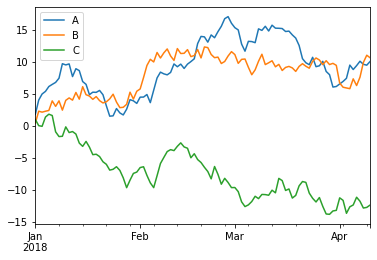

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.plot()

